**PART 1: Data Ingestion**

**Step 1: Downloading the Video**

In [ ]:
!pip install yt_dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.3/173.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 66.5 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import yt_dlp

video_url = "https://www.youtube.com/watch?v=dARr3lGKwk8"

ydl_opts = {
    'format': 'bestvideo+bestaudio/best',
    'outtmpl': '/content/drive/My Drive/ASST5_RAG/video.mp4'
}

with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    ydl.download([video_url])

[youtube] Extracting URL: https://www.youtube.com/watch?v=dARr3lGKwk8
[youtube] dARr3lGKwk8: Downloading webpage
[youtube] dARr3lGKwk8: Downloading tv client config
[youtube] dARr3lGKwk8: Downloading player aa3fc80b-main
[youtube] dARr3lGKwk8: Downloading tv player API JSON
[youtube] dARr3lGKwk8: Downloading ios player API JSON
[youtube] dARr3lGKwk8: Downloading m3u8 information
[info] dARr3lGKwk8: Downloading 1 format(s): 137+251
[download] Destination: /content/drive/My Drive/ASST5_RAG/video.mp4.f137.mp4
[download] 100% of   77.76MiB in 00:00:06 at 12.13MiB/s  
[download] Destination: /content/drive/My Drive/ASST5_RAG/video.mp4.f251.webm
[download] 100% of   45.34MiB in 00:00:08 at 5.67MiB/s   
[Merger] Merging formats into "/content/drive/My Drive/ASST5_RAG/video.mp4.mkv"
Deleting original file /content/drive/My Drive/ASST5_RAG/video.mp4.f251.webm (pass -k to keep)
Deleting original file /content/drive/My Drive/ASST5_RAG/video.mp4.f137.mp4 (pass -k to keep)


**Step 2: Speech-to-Text (Whisper Transcription)**

In [2]:
!pip install -U openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 16.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 128.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s 

In [3]:
import whisper

model = whisper.load_model("base")
result = model.transcribe("/content/drive/My Drive/ASST5_RAG/video.mkv")
full_transcript = result["text"]
print("Transcript extracted.")


100%|███████████████████████████████████████| 139M/139M [00:05<00:00, 25.2MiB/s]


Transcript extracted.


In [4]:
with open("/content/drive/My Drive/ASST5_RAG/full_transcript.txt", "w") as f:
    f.write(full_transcript)

print("Transcript saved as full_transcript.txt")

Transcript saved as full_transcript.txt


****Step 3: Splitting the Transcript into Chunks****

In [5]:
import math

duration = result["segments"][-1]["end"]  # Total video duration in seconds
chunk_duration = 10  # seconds

chunks = []
for seg in result["segments"]:
    start_time = seg["start"]
    end_time = seg["end"]
    text = seg["text"]
    chunk_start = math.floor(start_time / chunk_duration) * chunk_duration
    chunks.append({
        "start_time": chunk_start,
        "text": text
    })

# Save as JSON
import json
with open("/content/drive/My Drive/ASST5_RAG/transcript.json", "w") as f:
    json.dump(chunks, f)

print("Transcript chunks saved as transcript.json")


Transcript chunks saved as transcript.json


In [6]:
import json

with open("/content/drive/My Drive/ASST5_RAG/transcript.json", "r") as f:
    data = json.load(f)
    print(data[:6])


[{'start_time': 0, 'text': ' So, hello everyone. Welcome to the PC Seminar. Today we have this Professor Amir Mohad from'}, {'start_time': 0, 'text': " American University of Beirut and he'll be talking on the GERT and Parametri's complex"}, {'start_time': 10, 'text': ' city of token sliding and token jumping. Thank you for joining us, Professor. Over to you now.'}, {'start_time': 10, 'text': " Thank you, President. Thank you for having me. It's a real pleasure to be here."}, {'start_time': 20, 'text': " So, all right, let's jump right into it. So, since I did not really know the audience too well,"}, {'start_time': 30, 'text': ' I made the assumption that many of you maybe have not seen this area of combinatorial'}]


**Step 4: Extracting Keyframes (Every 5 Seconds)**


In [8]:
import cv2
import os


os.makedirs("/content/drive/My Drive/ASST5_RAG/frames", exist_ok=True)


vidcap = cv2.VideoCapture("/content/drive/My Drive/ASST5_RAG/video.mkv")
fps = vidcap.get(cv2.CAP_PROP_FPS)  # Get frames per second

# how many frames to skip (every 10 seconds)
frame_interval = int(fps * 10)

success, image = vidcap.read()
frame_number = 0

# going through the video and saving frames every 10 seconds
while success:
    if frame_number % frame_interval == 0:
        filename = f"/content/drive/My Drive/ASST5_RAG/frames/frame_{frame_number}.jpg"
        cv2.imwrite(filename, image)
    success, image = vidcap.read()
    frame_number += 1

print("Frames extracted every 10 seconds and saved successfully")


Frames extracted every 10 seconds and saved successfully


Total number of frames extracted: 376


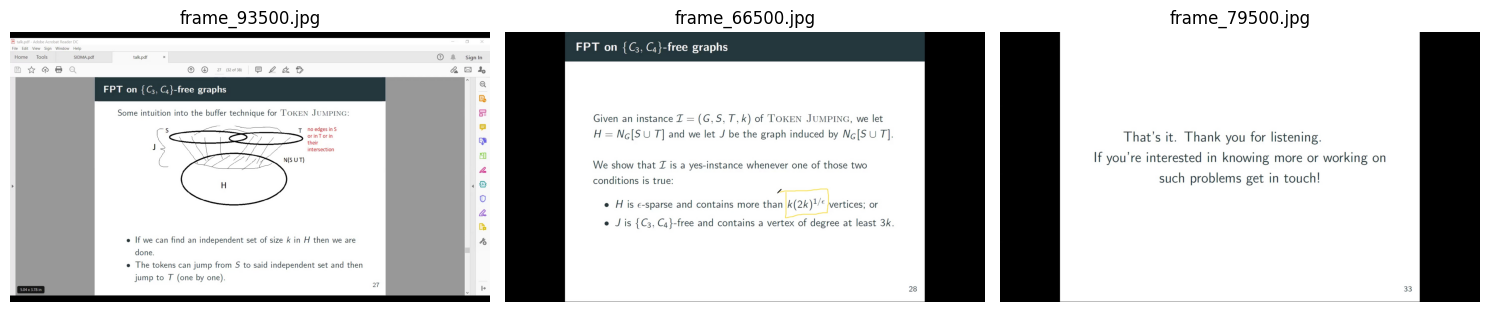

In [9]:
import random
from PIL import Image
import matplotlib.pyplot as plt

frames_path = "/content/drive/My Drive/ASST5_RAG/frames"

frame_files = sorted(os.listdir(frames_path))

num_frames = len(frame_files)
print(f"Total number of frames extracted: {num_frames}")

sample_frames = random.sample(frame_files, min(3, num_frames))

# plot 3 random frames
plt.figure(figsize=(15, 5))
for i, frame_name in enumerate(sample_frames):
    img_path = os.path.join(frames_path, frame_name)
    img = Image.open(img_path)
    plt.subplot(1, 3, i + 1)
    plt.imshow(img)
    plt.title(frame_name)
    plt.axis('off')

plt.tight_layout()
plt.show()


**Step 5: Text Embeddings (Sentence-Transformers)**

In [10]:
from sentence_transformers import SentenceTransformer
import numpy as np

text_model = SentenceTransformer('all-MiniLM-L6-v2')

texts = [chunk["text"] for chunk in chunks]
text_embeddings = text_model.encode(texts)

np.save("/content/drive/My Drive/ASST5_RAG/text_embeddings.npy", text_embeddings)
print("Text embeddings saved.")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Text embeddings saved.


In [12]:
import numpy as np

text_embeddings = np.load("/content/drive/My Drive/ASST5_RAG/text_embeddings.npy")
print("Embedding shape:", text_embeddings.shape)
print("First embedding vector (truncated to first 10 values):")
print(text_embeddings[0][:10])
print("Total number of embeddings:", len(text_embeddings))


Embedding shape: (525, 384)
First embedding vector (truncated to first 10 values):
[-0.02437694  0.02694121 -0.02087362 -0.07306794 -0.03822476 -0.04175
  0.05714177 -0.07600093  0.03963713 -0.02201928]
Total number of embeddings: 525


**Step 6: Image Embeddings using the CLIP model**

In [13]:
import torch
from transformers import CLIPProcessor, CLIPModel

clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

frames_path = "/content/drive/My Drive/ASST5_RAG/frames"
frame_files = sorted(os.listdir(frames_path))

image_embeddings = []

# processing each frame and generating embeddings
for frame_file in frame_files:
    image_path = os.path.join(frames_path, frame_file)
    image = Image.open(image_path).convert("RGB")  # Ensure it's RGB

    # Prepare the image for CLIP
    inputs = clip_processor(images=image, return_tensors="pt")

    # Get the image features (embeddings)
    with torch.no_grad():  # Faster inference, no gradients needed
        outputs = clip_model.get_image_features(**inputs)

    # Convert to numpy and flatten
    embedding = outputs.cpu().numpy().flatten()
    image_embeddings.append(embedding)

image_embeddings = np.array(image_embeddings)
np.save("/content/drive/My Drive/ASST5_RAG/image_embeddings.npy", image_embeddings)

print("Image embeddings saved. Shape:", image_embeddings.shape)


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

Image embeddings saved. Shape: (376, 512)


In [15]:
image_embeddings = np.load("/content/drive/My Drive/ASST5_RAG/image_embeddings.npy")
print("Image Embedding shape:", image_embeddings.shape)
print("First image embedding vector (first 10 values):")
print(image_embeddings[0][:10])
print("Total number of image embeddings:", len(image_embeddings))


Image Embedding shape: (376, 512)
First image embedding vector (first 10 values):
[-0.1503494  -0.26338845 -0.56551135 -0.07222581  0.15578671 -0.04308531
 -0.38712007  1.2720801   0.28359357  0.2737852 ]
Total number of image embeddings: 376




---



**PART 2: Retrieval Techniques**

**1st Technique: FAISS Index**

In [16]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 64.0 MB/s eta 0:00:00


In [17]:
import faiss
import numpy as np

text_embeddings = np.load("/content/drive/My Drive/ASST5_RAG/text_embeddings.npy").astype('float32')
dimension = text_embeddings.shape[1]  # Should be 384
print("Dimension of embeddings:", dimension)

# creating a FAISS index
index = faiss.IndexFlatL2(dimension)

# adding the embeddings to the index
index.add(text_embeddings)

faiss.write_index(index, "/content/drive/My Drive/ASST5_RAG/faiss.index")

print("FAISS index created and saved.")
print("Number of vectors in index:", index.ntotal)


Dimension of embeddings: 384
FAISS index created and saved.
Number of vectors in index: 525


*FAISS Search Test Code*

In [19]:
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np
import json

# 1️. text embeddings and FAISS index
text_embeddings = np.load("/content/drive/My Drive/ASST5_RAG/text_embeddings.npy").astype('float32')
index = faiss.read_index("/content/drive/My Drive/ASST5_RAG/faiss.index")

# 2️. transcript chunks (so we can retrieve the text)
with open("/content/drive/My Drive/ASST5_RAG/transcript.json", "r") as f:
    chunks = json.load(f)

# 3️. Load the same embedding model
text_model = SentenceTransformer('all-MiniLM-L6-v2')

# 4️. Example user question
query = "What is the topic of the seminar?"

# 5️. Convert query to embedding
query_embedding = text_model.encode([query]).astype('float32')

# 6️. Search FAISS index (top 3 closest chunks)
distances, indices = index.search(query_embedding, k=3)

# 7️. Print the results
print("Top 3 matching transcript chunks:\n")
for i, idx in enumerate(indices[0]):
    start_time = chunks[idx]['start_time']
    text = chunks[idx]['text']
    print(f"Rank {i+1}: Start Time = {start_time}s → Text: {text}")
    print("Distance:", distances[0][i])
    print("-" * 60)


Top 3 matching transcript chunks:

Rank 1: Start Time = 100s → Text:  who is my master's student. All right, so the outline of the talk, it's going to be in four sections.
Distance: 0.9336273
------------------------------------------------------------
Rank 2: Start Time = 140s → Text:  and what are the problems that remain to be solved. And then the last part of the lecture is where
Distance: 0.97321224
------------------------------------------------------------
Rank 3: Start Time = 0s → Text:  So, hello everyone. Welcome to the PC Seminar. Today we have this Professor Amir Mohad from
Distance: 1.0669175
------------------------------------------------------------


**2nd Technique: TF-IDF**

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import json

# Load the transcript chunks
with open("/content/drive/My Drive/ASST5_RAG/transcript.json", "r") as f:
    chunks = json.load(f)

# 1️. Extract texts from transcript chunks
texts = [chunk["text"] for chunk in chunks]  # You already have this

# 2️. Create TF-IDF Vectorizer and fit it
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)

# 3️. Function to search using TF-IDF
def search_tfidf(query, top_k=3):
    query_vector = tfidf_vectorizer.transform([query])
    cosine_similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()
    top_indices = cosine_similarities.argsort()[-top_k:][::-1]  # Top k highest scores

    results = []
    for i in top_indices:
        results.append({
            "rank": len(results)+1,
            "start_time": chunks[i]["start_time"],
            "text": chunks[i]["text"],
            "score": cosine_similarities[i]
        })
    return results


**3rd Technique: BM25**

In [22]:
!pip install rank_bm25

In [23]:
from rank_bm25 import BM25Okapi

# 1️. Prepare tokenized corpus (list of lists of words)
tokenized_corpus = [text.lower().split() for text in texts]

# 2️. Initialize BM25
bm25 = BM25Okapi(tokenized_corpus)

# 3️. Function to search using BM25
def search_bm25(query, top_k=3):
    tokenized_query = query.lower().split()
    scores = bm25.get_scores(tokenized_query)
    top_indices = np.argsort(scores)[-top_k:][::-1]

    results = []
    for i in top_indices:
        results.append({
            "rank": len(results)+1,
            "start_time": chunks[i]["start_time"],
            "text": chunks[i]["text"],
            "score": scores[i]
        })
    return results


*Test TD-IDF and BM25*

In [24]:
query = "What is the topic of the seminar?"

print("TF-IDF Results:\n")
tfidf_results = search_tfidf(query)
for result in tfidf_results:
    print(f"Rank {result['rank']}: Start Time = {result['start_time']}s → Text: {result['text']}")
    print("TF-IDF Score:", result["score"])
    print("-" * 60)

print("\nBM25 Results:\n")
bm25_results = search_bm25(query)
for result in bm25_results:
    print(f"Rank {result['rank']}: Start Time = {result['start_time']}s → Text: {result['text']}")
    print("BM25 Score:", result["score"])
    print("-" * 60)


TF-IDF Results:

Rank 1: Start Time = 3320s → Text:  So, do you know what is the length of the, the length of the changes? Actually, the number of
TF-IDF Score: 0.3159423564308463
------------------------------------------------------------
Rank 2: Start Time = 0s → Text:  So, hello everyone. Welcome to the PC Seminar. Today we have this Professor Amir Mohad from
TF-IDF Score: 0.28066889049800836
------------------------------------------------------------
Rank 3: Start Time = 290s → Text:  is by looking at the state space or what we call the reconfiguration graph of the 15 puzzle.
TF-IDF Score: 0.25324786133131716
------------------------------------------------------------

BM25 Results:

Rank 1: Start Time = 3320s → Text:  So, do you know what is the length of the, the length of the changes? Actually, the number of
BM25 Score: 8.529434437542
------------------------------------------------------------
Rank 2: Start Time = 290s → Text:  is by looking at the state space or what we cal